<a href="https://colab.research.google.com/github/ProfDoeg/Colegio_Invisible/blob/master/02_cuaderno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [78]:
#! rm -r Colegio_Invisible

In [79]:
! git clone https://github.com/ProfDoeg/Colegio_Invisible.git

Cloning into 'Colegio_Invisible'...
remote: Enumerating objects: 166, done.
remote: Counting objects: 100% (166/166), done.
remote: Compressing objects: 100% (164/164), done.
remote: Total 166 (delta 100), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (166/166), 8.68 MiB | 13.06 MiB/s, done.
Resolving deltas: 100% (100/100), done.


In [ ]:
! pip install cryptos

In [ ]:
! pip install eciespy

# Basic Cryptography and Script Writing

## Outline

In this introduction we cover:

- cryptographic hash functions
- symmetric cryptography
- asymmetric cryptography
- scripts

By the end of the exposition you will:

- understand the structure of python script
- be able to run a Python script from terminal
- be able direct the script with user input
- understand the features of a cryptographic **hash function**
- be able to hash a string or file using **SHA256**
- understand the features of **symmetric cryptography**
- be able to generate an **AES** cryptographic **key**
- be able to **AES encrypt** a string or file using a symmetric key
- be able to **AES decrypt** a string or file using AES
- understand the features of **asymmetric cryptography**
- be able to generate a new **private key** object
- be able to access the byte or hex value of the private key
- be able to import a previously generated **private key** from bytes
- be able to extract a **public key** from the private key
- be able to access the byte or hex value of the public key
- understand ECDSA digital signature
- be able to **sign** a message with a private key
- be able to **verify** a message signature with a public key
- understand ECIES
- be able to **ECIES encrypt** with a public key
- be able to **ECIES decrypt** with a private key

----

# Cryptographic Hash Functions

A cryptographic hash function is an algorithm that takes an arbitrary amount of data input and produces a fixed-size output  of gibberish called a digest, checksum, fingerprint, hash code, hash value, or just “hash.” 

$$ F(\text{input})\longrightarrow \text{hash}$$

Cryptographic hash function should have the following features. They should be:

- **[ONE-WAY FUNCTION]** the input to the function cannot be derived from the output 
- **[INPUT HYPERSENSITIVITE]** a tiny change in input should drastically change output
- **[DETERMINISTIC]** the output of the function should always be the same for a given input
-  **[NON-PREDICTABLE]** there are no computational short cuts in producing the hash from the input
- **[COLLISION RESISTANT]** two different inputs should never produce the same hash ouput for the remainder of all human history

**SHA256** is a cryptographic hash function with a 256 bit output prescribed by the U.S. National Institute of Standards and Technology.

We implement SHA256 in Python using the **`hashlib`**

## Apply SHA256 using Terminal

UNIX like systems can hash from the terminal

It can be done on:

- a string
- a file

In [4]:
! echo 🐶| shasum -a 256 

8890ce374cabbc70638ffa32507e16ca240fd1631907897c65b3e439dc2fa131  -


In [5]:
! ls Colegio_Invisible/img

colegio_invisible.jpeg	hg_drop.jpeg  hg_house.jpeg   hg_rough.png
hg_cry.jpeg		hg_hide.jpeg  hg_invite.jpeg  hg_xmas.jpeg


In [6]:
! shasum -a 256 Colegio_Invisible/img/colegio_invisible.jpeg

1d5879bb04266dc0c215414dcc2045ea09082c45f532657fc8bc0bbaab588fce  Colegio_Invisible/img/colegio_invisible.jpeg


## Hashing Using Python

### Python Hashing Module `hashlib`

We will be using the **`hashlib`** module to do our hashing work. A module is a toybox filled with delights.


In [7]:
import hashlib
type(hashlib)

module

In [8]:
hashlib.algorithms_available

{'blake2b',
 'blake2s',
 'md5',
 'sha1',
 'sha224',
 'sha256',
 'sha384',
 'sha3_224',
 'sha3_256',
 'sha3_384',
 'sha3_512',
 'sha512',
 'shake_128',
 'shake_256'}

### Prepare the Bytestring Input

The input must be a bytestring, a string of `type` **`bytes`**.

We can prepare a bytestring by:
- using `b'  '` to write the literal
- convert a string to `bytes` using `.encode()`  


In [19]:
b'a byte string'

b'a byte string'

In [14]:
type(b'a byte string')

bytes

In [9]:
type('🐶')

str

In [10]:
str.encode('🐶')

b'\xf0\x9f\x90\xb6'

In [12]:
'🐶'.encode()

b'\xf0\x9f\x90\xb6'

### Apply SHA256 to Bytestring using Python

We will be using `sha256`. The following code creates a `sha256 HASH object`

- `.digest()` returns the sha256 digest as a bytestring
- `.hexdigest()` returns the sha256 digest as a hexstring

In [13]:
H=hashlib.sha256(b'a byte string')
H

<sha256 HASH object @ 0x7f6c6a1f0d20>

In [14]:
H.hexdigest()

'c4305ca4e36e8476a629d8e9ff44b4edcdc0e1d8843baa06d5e2c070a79f4986'

In [15]:
H.digest()

b'\xc40\\\xa4\xe3n\x84v\xa6)\xd8\xe9\xffD\xb4\xed\xcd\xc0\xe1\xd8\x84;\xaa\x06\xd5\xe2\xc0p\xa7\x9fI\x86'

In [16]:
hashlib.sha256( '🐶'.encode() ).digest()

b'\x89^\xb9\xa2\xe6\xd4\x97\xe2*EjU\xf4\x03)=\x80p1,\x95&@\xb4\x98\xb7\xb6\x80\xdaG\xa3\xac'

In [17]:
hashlib.sha256( '🐶'.encode() ).hexdigest()

'895eb9a2e6d497e22a456a55f403293d8070312c952640b498b7b680da47a3ac'

In [18]:
hashlib.sha256( '🐶\n'.encode() ).hexdigest()

'8890ce374cabbc70638ffa32507e16ca240fd1631907897c65b3e439dc2fa131'

### Apply SHA256 to File using Python

File is opened as **binary** using `open()` in mode `'rb'` read binary.

In [19]:
img_file=open('Colegio_Invisible/img/colegio_invisible.jpeg','rb')
img_bytes=img_file.read()
img_file.close()

In [20]:
hashlib.sha256( img_bytes ).hexdigest()

'1d5879bb04266dc0c215414dcc2045ea09082c45f532657fc8bc0bbaab588fce'

In [21]:
def sha256_file(path):
  bytestring = open(path,'rb').read()
  return hashlib.sha256( bytestring ).hexdigest()

In [22]:
sha256_file('Colegio_Invisible/img/colegio_invisible.jpeg')

'1d5879bb04266dc0c215414dcc2045ea09082c45f532657fc8bc0bbaab588fce'

### Apply SHA256 to File Using a Python Script

Here the Python program is packaged in a script.

- a script is called from the Terminal following a call to `python`
- arguments can be passed to the script using `argv`

`> python path/to/script.py arg1 arg2`

Look at the contents of script `sha_256.py` in `Colegio_Invisible/scripts` 

https://www.sublimetext.com/

In [51]:
! cat Colegio_Invisible/scripts/sha_256.py

##################################################################################
# this script will generate an SHA256 hash of input
#
# run at the terminal using the following
# > python sha_256.py <FILE_PATH> 
# <FILE_PATH>: path to file
#
#EXAMPLE:
#>python sha_256.py files/file_to_hash.bin
#
##################################################################################

from sys import argv
import hashlib


if len(argv)==2:
    _, file_path= argv
elif len(argv)!=2:
    print('Wrong number arguments. 1 expected.')
    print('> python sha_256.py <FILE_PATH> ')
    exit()


def sha256_file(path):
  bytestring = open(path,'rb').read()
  return hashlib.sha256( bytestring ).hexdigest()

#generate sha256 hash
file_hash=sha256_file(file_path)

print('Hashing complete') 
print('SHA256 of :', file_path)
print(file_hash)

In [23]:
! python Colegio_Invisible/scripts/sha_256.py 

Wrong number arguments. 1 expected.
> python sha_256.py <FILE_PATH> 


In [24]:
! python Colegio_Invisible/scripts/sha_256.py Colegio_Invisible/img/colegio_invisible.jpeg

Hashing complete
SHA256 of : Colegio_Invisible/img/colegio_invisible.jpeg
1d5879bb04266dc0c215414dcc2045ea09082c45f532657fc8bc0bbaab588fce


In [54]:
fileHash=! {'python Colegio_Invisible/scripts/sha_256.py Colegio_Invisible/img/colegio_invisible.jpeg'}
fileHash

['Hashing complete',
 'SHA256 of : Colegio_Invisible/img/colegio_invisible.jpeg',
 '1d5879bb04266dc0c215414dcc2045ea09082c45f532657fc8bc0bbaab588fce']

In [55]:
fileHash[-1]

'1d5879bb04266dc0c215414dcc2045ea09082c45f532657fc8bc0bbaab588fce'

# Symmetric Cryptography

Encryption uses a key to map a plaintext to a ciphertext. Decryption is the reverse process where a key is used to map the ciphertext back to a plain text.

Symmetric cryptography uses one single key that needs to be shared among all participants who are communicating. The encryption and decryption step use the same key.



AES (Advanced Encryption Standard) is a symmetric block cipher standardized by NIST . It has a fixed data block size of 16 bytes. Its keys can be 128, 192, or 256 bits long.

https://en.wikipedia.org/wiki/Advanced_Encryption_Standard



## AES in Python Using `ecies`

The **`eciespy`** library is an encryption library used in ethereum development. It does lots of things including including AES (symmetric encryption) and ECC (asymmetric cyptography). We will use it do most of our things.

https://ecies.org/py/

In [31]:
import ecies
type(ecies)

module

## Prepare the Encryption Key

In [28]:
bytekey256=hashlib.sha256(b'semilla de mostaza').digest()
bytekey256

b'&c\xa89\x0f\x8fq]G@`7\xab\xf4B\x876\x9ao\xe5\x9b=\x91,7T\xd8k\xf5\x1c\xca\xbc'

The 256 bits are stored as 32 bytes. Remember each byte is 8 bits.

In [29]:
len(bytekey256)

32

In [30]:
len(bytekey256)*8

256

## Encryption: Generating Ciphertext From Plaintext

In [32]:
plaintext=b'this is my plain text byte string'

In [34]:
ciphertext=ecies.aes_encrypt(key=bytekey256,plain_text=plaintext)
ciphertext

b'\x8d\x86\xf1A\xf1\xaf\xe2\x94\x0bM\xc2D\xa5\x02c\xd1\xf1:\x97B\xe6\x83\x91k\x01\x83h\xef\x13y\x82]o\xb0\x9b\xa9[\xbd\x89Y\xf2p^\xb3\xf9a\x05Q\xb5 \xa1\xdb\xc8\xf7T\xea\xe3\xbe\xcd\xfcez\xadb4'

## Decryption: Recovering Plaintext from Cipertext

In [36]:
recoveredtext=ecies.aes_decrypt(key=bytekey256,cipher_text=ciphertext)
recoveredtext

b'this is my plain text byte string'

## AES on Files





### Encrypting Files

In [37]:
f=open('Colegio_Invisible/img/colegio_invisible.jpeg','rb')
plainimg=f.read()
f.close()

cipherimg=ecies.aes_encrypt(key=bytekey256,plain_text=plainimg)

In [50]:
def aes_encrypt_file(plainfile_path,cipherfile_path,password):
  plain = open(plainfile_path,'rb').read()
  bytekey = hashlib.sha256( password.encode() ).digest()
  cipher = ecies.aes_encrypt(key=bytekey,plain_text=plain)
  open(cipherfile_path,'wb').write(cipher)


In [51]:
aes_encrypt_file('Colegio_Invisible/img/colegio_invisible.jpeg','cipher_img.aes','password')

In [52]:
! ls

ciper_img.aes  cipher_img.aes  Colegio_Invisible  sample_data


In [53]:
! head -c 50 ciper_img.aes

�����_u�k�:��g씝����[�l�# �Pt��/��'��)�xA��>�

### Decrypting Files

In [54]:
f=open('cipher_img.aes','rb')
cipherimg2=f.read()
f.close()

aes_key=hashlib.sha256( 'password'.encode()  ).digest()

plainimg2=ecies.aes_decrypt( key= aes_key , cipher_text=cipherimg2)

In [55]:
def aes_decrypt_file(cipherfile_path,extractfile_path,password):
  cipher = open(cipherfile_path,'rb').read()
  bytekey = hashlib.sha256( password.encode() ).digest()
  extract = ecies.aes_decrypt(key=bytekey,cipher_text=cipher)
  open(extractfile_path,'wb').write(extract)

In [56]:
aes_decrypt_file('cipher_img.aes','extract_img.jpeg','password')

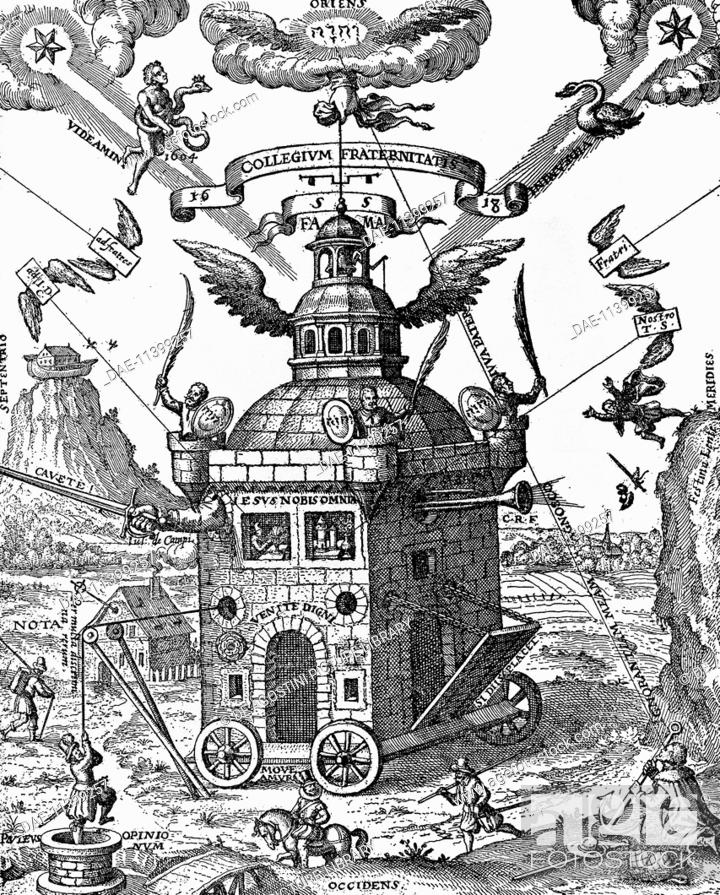

In [58]:
from IPython.display import Image
display(Image('extract_img.jpeg'))

## AES Using Python Scripts

In [80]:
! python Colegio_Invisible/scripts/aes_encrypt.py 'Colegio_Invisible/img/colegio_invisible.jpeg' 'pic.aes'

Input password for encryption: 
Repeat password for encryption: 

Passwords match...
Success: Colegio_Invisible/img/colegio_invisible.jpeg AES encryption complete
Written to: pic.aes


In [81]:
! python Colegio_Invisible/scripts/aes_decrypt.py 'pic.aes' 'dec.jpeg'

Input password for decryption: 
Success: pic.aes decryption complete
Written to: dec.jpeg


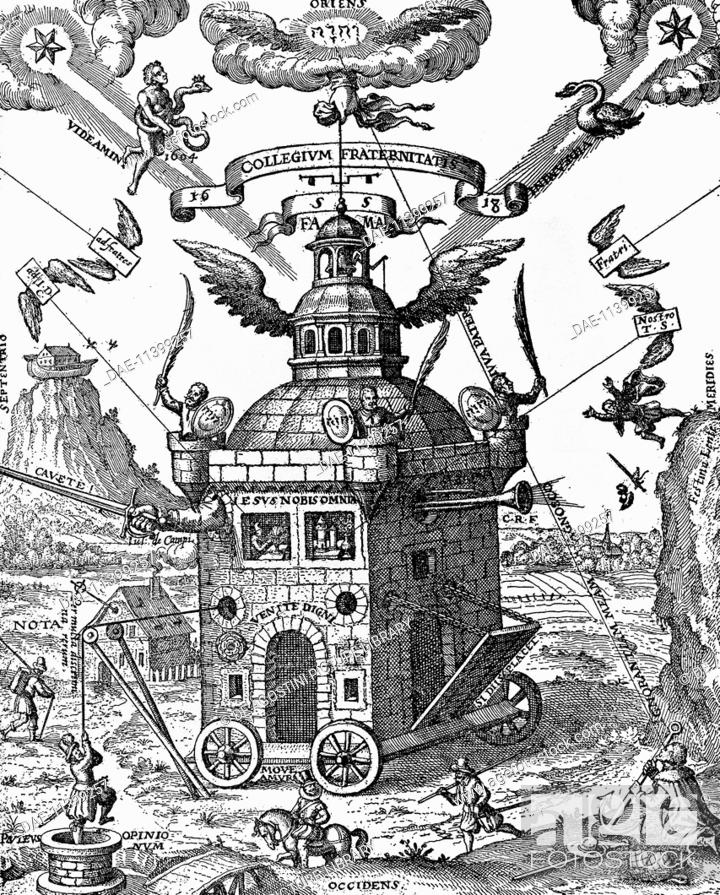

In [82]:
display(Image('dec.jpeg'))

In [77]:
! python Colegio_Invisible/scripts/sha_256.py dec.jpeg

Traceback (most recent call last):
  File "Colegio_Invisible/scripts/sha_256.py", line 30, in <module>
    file_hash=sha256_file(file_path)
  File "Colegio_Invisible/scripts/sha_256.py", line 26, in sha256_file
    bytestring = open(path,'rb').read()
FileNotFoundError: [Errno 2] No such file or directory: 'dec.jpeg'


In [5]:
! ls Colegio_Invisible/scripts
! cat Colegio_Invisible/scripts/ecc_generate.py

ecc_generate.py  ecc_keydump.py  ecc_pubkey_extract.py
##################################################################################
# this script will generate an ECC private key from a computer generate 256 bit random number
# the key is saved to an AEC encrypted (password protected) file
#
# run at the terminal using the following
# > python ecc_generate.py <PRIVKEY_PATH> <PRIVKEY_PASSWORD>
# <PRIVKEY_PATH>: path to generated private key
# <PRIVKEY_PASSWORD>: password for private key file
#
#EXAMPLE:
#>python ecc_generate.py keys\privkey.bin password123
#
# IF <PRIVKEY_PASSWORD> IS NOT INCLUDED USER WILL BE PROMPTED TO ENTER IT SECURELY
##################################################################################

from sys import argv
import getpass
import ecies
import eth_keys
import hashlib
from Crypto.PublicKey import ECC
from Crypto.Random import get_random_bytes


if len(argv)==3:
    _, privkey_path, privkey_password = argv
elif len(argv)==2:
    _, privkey_path = ar

In [5]:
! mkdir teclas

In [6]:
! python Colegio_Invisible/scripts/ecc_generate.py teclas/my_privkey.enc

Input password for encrypting keyfile: 
Repeat password for encrypting keyfile: 

Passwords match...
Private key generation complete
Private key encrypted and written to binary file: teclas/my_privkey.enc
f49ec9fa37a8b64912d1a1b2e5d45929d1bcb83549800841d8ed7e9b5cae4ae68a9a21d8a691fe95dafdc229a9c692b35ae7c3358bef51314d6b5d0bbf10b8e3


In [7]:
#! rm -r Colegio_Invisible

In [7]:
! python Colegio_Invisible/scripts/ecc_pubkey_extract.py teclas/my_privkey.enc teclas/my_pubkey.enc

Input password for private key file: 
Input password for public key file: 
Repeat password for public key file: 

Passwords match...
Completed public key extraction from: teclas/my_privkey.enc
Public key encrypted and written to binary file: teclas/my_pubkey.enc
a86b28c0426c6dccf325d6c5d19e7aa798e5501e534c5c18f5be1422919996dbacd3a66a7a6c18337c9473ab5ec23d2aaf8fd9ee03576488a70af573a8c31382546dbae54e2d72936744f7f20cc9703e77864e6dd550fe957d66e1fa7f38badd


In [8]:
! python Colegio_Invisible/scripts/ecc_keydump.py teclas/my_pubkey.enc

Input password for key file: 
0a8540f0d683628cb7e52b60c2e94c5b533c0c2febb1d18aa05df6d2413d9d4c19645c058a3675c7c8d3f6233ae239bb55c74d7ef573ec44644c9ac54356f59d


In [9]:
pubkey=!{'python Colegio_Invisible/scripts/ecc_keydump.py teclas/my_pubkey.enc'}
pubkey

['Input password for key file: ',
 '0a8540f0d683628cb7e52b60c2e94c5b533c0c2febb1d18aa05df6d2413d9d4c19645c058a3675c7c8d3f6233ae239bb55c74d7ef573ec44644c9ac54356f59d']

In [25]:
pbytes.fromhex(pubkey[-1])

b'@\x9d%\xe0V[\x1d\x9e,\x86\x9cJs{o;JT\xfd\xf2:\x82^_[\xdb\x03"\xec\x10j\xdcP!n\xc5|_htv\xba\xe40I\xf0\xa4\x83\xcf4\xb2\x8b\xc5PH\xbf\xe5Ib\xf0@\x07\xc2\x9b'